In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

In [3]:
class Ant:
    def __init__(self, num_cities):
        self.tour = []
        self.total_distance = 0
        self.num_cities = num_cities

    def clear(self):
        self.tour = []
        self.total_distance = 0

In [4]:
def initialize_pheromone(num_cities, initial_pheromone):
    return np.ones((num_cities, num_cities)) * initial_pheromone

In [5]:
def calculate_visibility(cities):
    num_cities = len(cities)
    visibility = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                visibility[i][j] = 1.0 / cities[i].distance(cities[j])
    return visibility

# ACO System Algorithm

In [6]:
def select_next_city(current_city, unvisited_cities, pheromone, visibility, alpha, beta):
    pheromone_values = np.array([pheromone[current_city][i] for i in unvisited_cities])
    visibility_values = np.array([visibility[current_city][i] for i in unvisited_cities])
    
    probabilities = (pheromone_values**alpha) * (visibility_values**beta)
    probabilities /= np.sum(probabilities)
    
    return np.random.choice(unvisited_cities, p=probabilities)

In [7]:
def construct_solution(ant, cities, pheromone, visibility, alpha, beta):
    num_cities = len(cities)
    ant.clear()
    start_city = np.random.randint(num_cities)
    ant.tour.append(start_city)
    
    unvisited_cities = list(range(num_cities))
    unvisited_cities.remove(start_city)
    
    current_city = start_city
    while unvisited_cities:
        next_city = select_next_city(current_city, unvisited_cities, pheromone, visibility, alpha, beta)
        ant.tour.append(next_city)
        ant.total_distance += cities[current_city].distance(cities[next_city])
        unvisited_cities.remove(next_city)
        current_city = next_city
    
    # Return to the starting city
    ant.total_distance += cities[current_city].distance(cities[start_city])

In [8]:
def update_pheromone(pheromone, ants, rho, Q):
    num_cities = pheromone.shape[0]
    # Evaporation
    pheromone *= (1 - rho)
    
    # Deposit
    for ant in ants:
        contribution = Q / ant.total_distance
        for i in range(len(ant.tour) - 1):
            from_city = ant.tour[i]
            to_city = ant.tour[i + 1]
            pheromone[from_city][to_city] += contribution
            pheromone[to_city][from_city] += contribution
        # Add contribution for the return to the start
        start_city = ant.tour[0]
        last_city = ant.tour[-1]
        pheromone[last_city][start_city] += contribution
        pheromone[start_city][last_city] += contribution

In [9]:
def aco_tsp(cities, num_ants, num_iterations, alpha, beta, rho, Q, initial_pheromone):
    num_cities = len(cities)
    pheromone = initialize_pheromone(num_cities, initial_pheromone)
    visibility = calculate_visibility(cities)
    
    best_distance = float('inf')
    best_tour = None
    
    for iteration in range(num_iterations):
        ants = [Ant(num_cities) for _ in range(num_ants)]
        
        for ant in ants:
            construct_solution(ant, cities, pheromone, visibility, alpha, beta)
        
        # Find the best ant of this iteration
        iteration_best_ant = min(ants, key=lambda x: x.total_distance)
        
        if iteration_best_ant.total_distance < best_distance:
            best_distance = iteration_best_ant.total_distance
            best_tour = iteration_best_ant.tour
        
        update_pheromone(pheromone, ants, rho, Q)
    
    return best_tour, best_distance

In [10]:
def plot_tour(cities, tour):
    x = [cities[i].x for i in tour] + [cities[tour[0]].x]
    y = [cities[i].y for i in tour] + [cities[tour[0]].y]
    plt.plot(x, y, 'ro-')
    plt.title('Best Tour Found by ACO')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [11]:
if __name__ == "__main__":
    np.random.seed(42)
    num_cities = 10
    cities = [City(np.random.uniform(0, 100), np.random.uniform(0, 100)) for _ in range(num_cities)]
    
    num_ants = 18
    num_iterations = 100
    alpha = 1
    beta = 2
    rho = 0.1
    Q = 100
    initial_pheromone = 1.0
    
    best_tour, best_distance = aco_tsp(cities, num_ants, num_iterations, alpha, beta, rho, Q, initial_pheromone)
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")
    
    plot_tour(cities, best_tour)

Best tour: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5]
Best distance: 290.3067737777875


Ant 1 Tour Distance: 312.2388192989888
Ant 2 Tour Distance: 412.9014151052222
Ant 3 Tour Distance: 304.23680206888343
Ant 4 Tour Distance: 316.9848333298359
Ant 5 Tour Distance: 354.33170702247924
Ant 6 Tour Distance: 374.77586978120615
Ant 7 Tour Distance: 290.30677377778755
Ant 8 Tour Distance: 290.30677377778755
Ant 9 Tour Distance: 298.308791007893
Ant 10 Tour Distance: 290.30677377778755


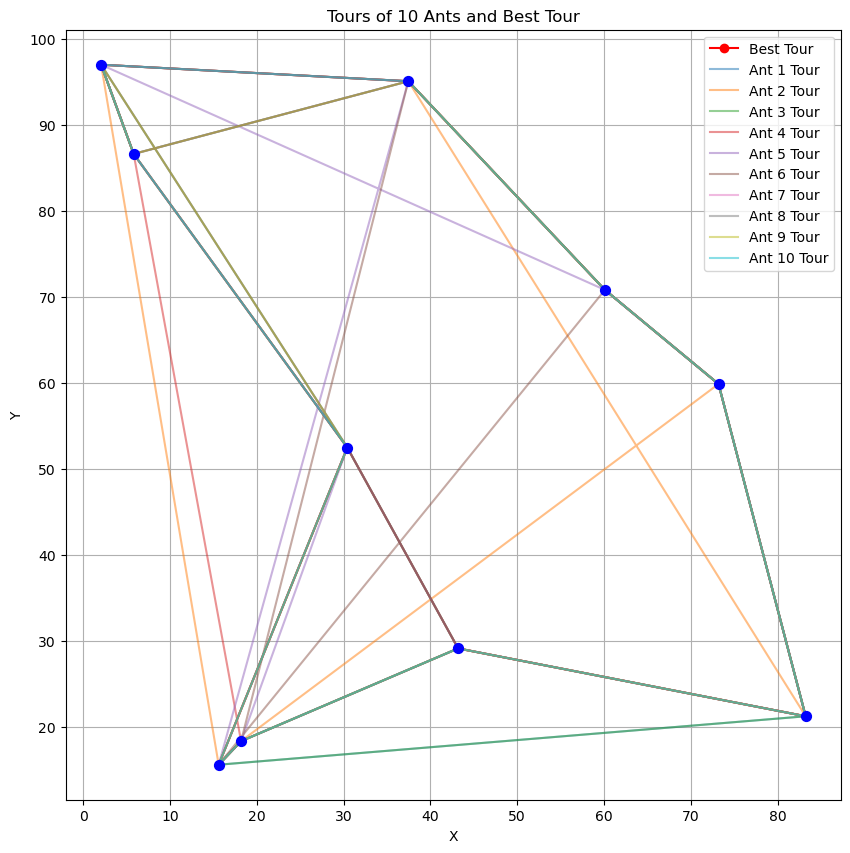

Best tour: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5]
Best distance: 290.3067737777875


In [12]:
if __name__ == "__main__":
    np.random.seed(42)
    num_cities = 10
    cities = [City(np.random.uniform(0, 100), np.random.uniform(0, 100)) for _ in range(num_cities)]
    
    num_ants = 10
    num_iterations = 100
    alpha = 1
    beta = 2
    rho = 0.1
    Q = 100
    initial_pheromone = 1.0
    
    # Initialize pheromone and visibility
    pheromone = initialize_pheromone(num_cities, initial_pheromone)
    visibility = calculate_visibility(cities)
    
    best_distance = float('inf')
    best_tour = None
    
    # Run ACO for the specified number of iterations
    for iteration in range(num_iterations):
        ants = [Ant(num_cities) for _ in range(num_ants)]
        
        for ant in ants:
            construct_solution(ant, cities, pheromone, visibility, alpha, beta)
        
        # Find the best ant of this iteration
        iteration_best_ant = min(ants, key=lambda x: x.total_distance)
        
        if iteration_best_ant.total_distance < best_distance:
            best_distance = iteration_best_ant.total_distance
            best_tour = iteration_best_ant.tour
        
        update_pheromone(pheromone, ants, rho, Q)
    
    # Print each ant's tour distance
    for i, ant in enumerate(ants):
        print(f"Ant {i+1} Tour Distance: {ant.total_distance}")
    
    # Plotting the best tour
    plt.figure(figsize=(10, 10))
    x_best = [cities[i].x for i in best_tour] + [cities[best_tour[0]].x]
    y_best = [cities[i].y for i in best_tour] + [cities[best_tour[0]].y]
    plt.plot(x_best, y_best, 'ro-', label='Best Tour')
    
    # Plotting each ant's tour
    for i, ant in enumerate(ants):
        x_ant = [cities[j].x for j in ant.tour] + [cities[ant.tour[0]].x]
        y_ant = [cities[j].y for j in ant.tour] + [cities[ant.tour[0]].y]
        plt.plot(x_ant, y_ant, '-', label=f'Ant {i+1} Tour', alpha=0.5)
    
    # Plotting the cities
    city_x = [city.x for city in cities]
    city_y = [city.y for city in cities]
    plt.scatter(city_x, city_y, color='blue', s=50, zorder=5)
    
    plt.title('Tours of 10 Ants and Best Tour')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")

# MAX-MIN Algorithm

In [13]:
def initialize_pheromone_mmas(num_cities, tau_max):
    return np.ones((num_cities, num_cities)) * tau_max

In [14]:
def enforce_pheromone_limits(pheromone, tau_min, tau_max):
    pheromone[pheromone < tau_min] = tau_min
    pheromone[pheromone > tau_max] = tau_max

In [15]:
def update_pheromone_mmas(pheromone, best_ant, rho, Q, tau_min, tau_max):
    # Evaporation
    pheromone *= (1 - rho)
    
    # Deposit pheromone only from the best ant
    contribution = Q / best_ant.total_distance
    for i in range(len(best_ant.tour) - 1):
        from_city = best_ant.tour[i]
        to_city = best_ant.tour[i + 1]
        pheromone[from_city][to_city] += contribution
        pheromone[to_city][from_city] += contribution
    # Add contribution for the return to the start
    start_city = best_ant.tour[0]
    last_city = best_ant.tour[-1]
    pheromone[last_city][start_city] += contribution
    pheromone[start_city][last_city] += contribution
    
    # Enforce limits
    enforce_pheromone_limits(pheromone, tau_min, tau_max)

In [18]:
import numpy as np

def mmas_tsp(cities, num_ants, num_iterations, alpha, beta, rho, Q, tau_max, tau_min):
    num_cities = len(cities)
    # initialize pheromone matrix
    tau = np.full((num_cities, num_cities), tau_max)
    eta = np.zeros_like(tau)
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                eta[i, j] = 1.0 / cities[i].distance(cities[j])

    best_tour = None
    best_distance = np.inf

    tours_history = []         # <-- record all tours here

    for iteration in range(num_iterations):
        all_tours = []
        all_distances = []

        # each ant builds a tour
        for ant in range(num_ants):
            unvisited = set(range(num_cities))
            current = np.random.choice(list(unvisited))
            tour = [current]
            unvisited.remove(current)

            while unvisited:
                probs = []
                for j in unvisited:
                    probs.append((tau[current, j] ** alpha) * (eta[current, j] ** beta))
                probs = np.array(probs)
                probs /= probs.sum()

                next_city = np.random.choice(list(unvisited), p=probs)
                tour.append(next_city)
                unvisited.remove(next_city)
                current = next_city

            all_tours.append(tour)
            # compute its length
            dist = 0.0
            for i in range(num_cities):
                a, b = tour[i], tour[(i + 1) % num_cities]
                dist += cities[a].distance(cities[b])
            all_distances.append(dist)

            # update best
            if dist < best_distance:
                best_distance = dist
                best_tour = tour

        # evaporate
        tau *= (1.0 - rho)
        # deposit only on best ant of this iteration (iteration‐best strategy)
        ib_index = np.argmin(all_distances)
        ib_tour = all_tours[ib_index]
        ib_length = all_distances[ib_index]
        deposit = Q / ib_length
        for i in range(num_cities):
            a, b = ib_tour[i], ib_tour[(i + 1) % num_cities]
            tau[a, b] += deposit
            tau[b, a] += deposit

        # enforce min/max
        tau = np.clip(tau, tau_min, tau_max)

        # store this iteration’s tours
        tours_history.append(all_tours)

    return best_tour, best_distance, tours_history

Best tour: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5]
Best distance: 290.307


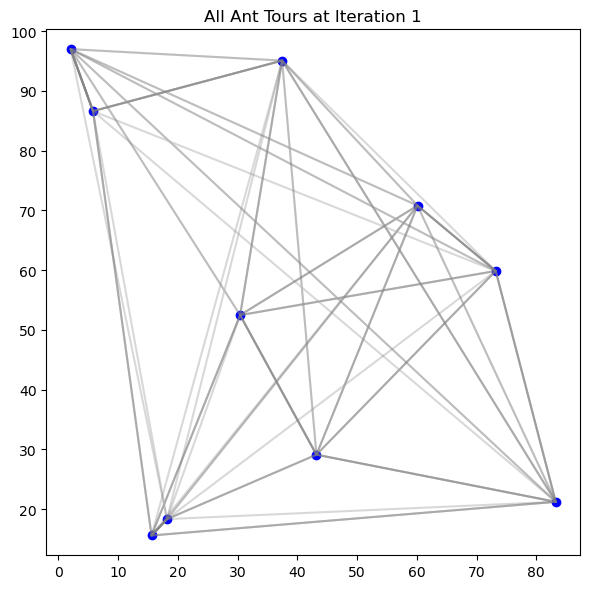

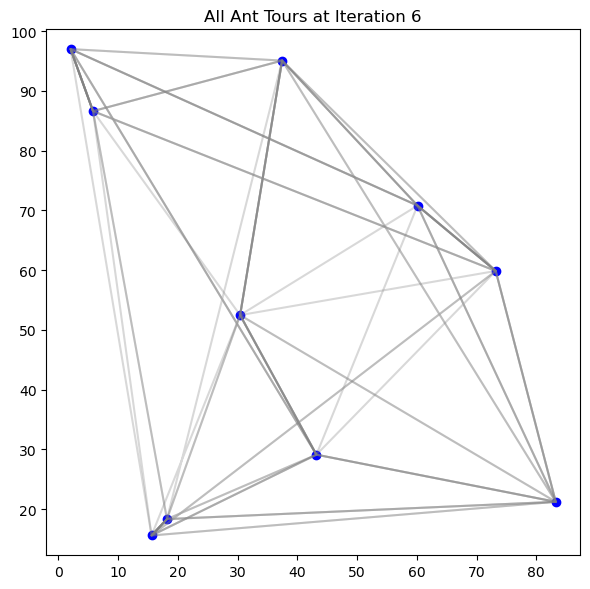

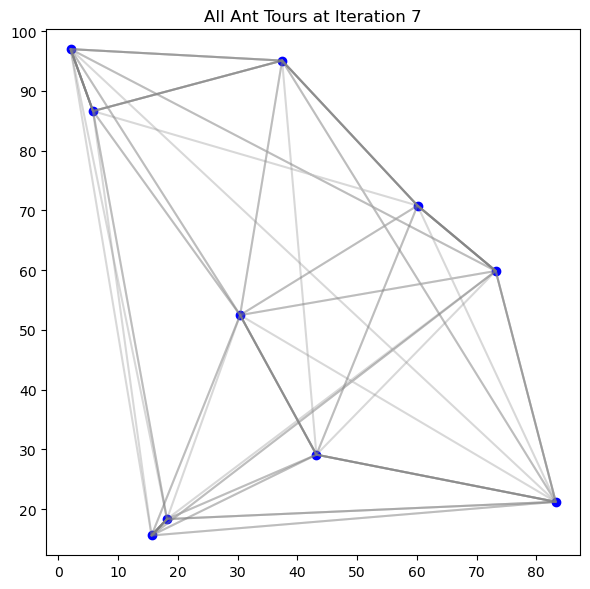

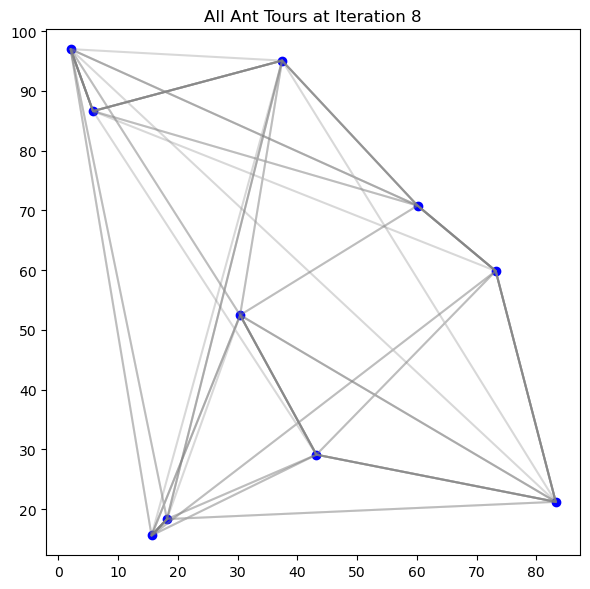

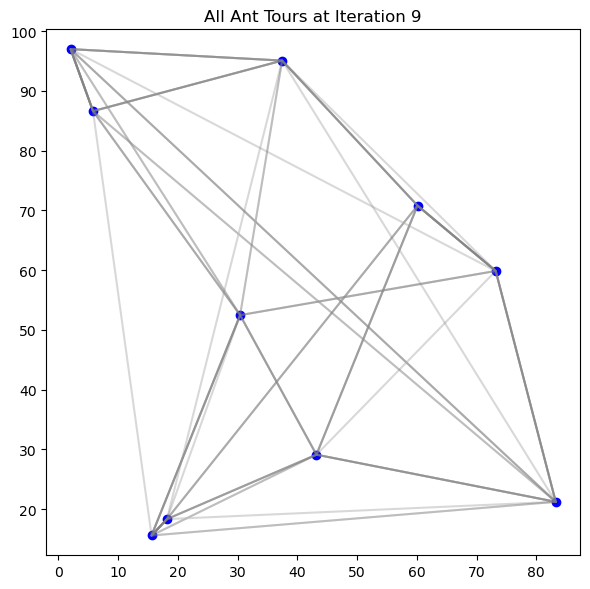

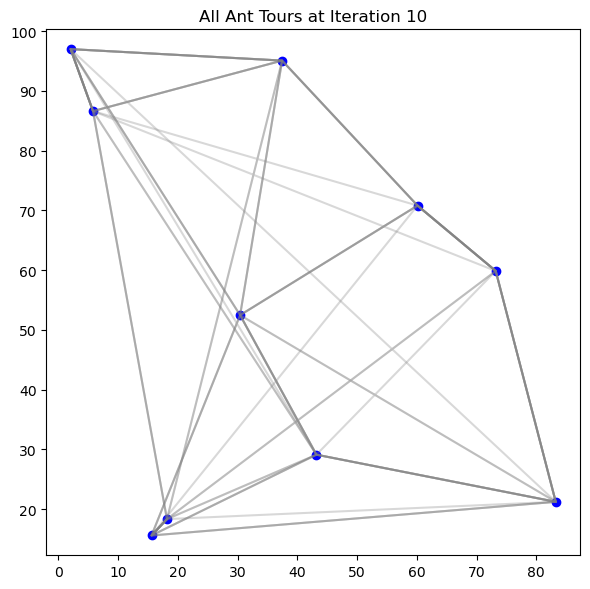

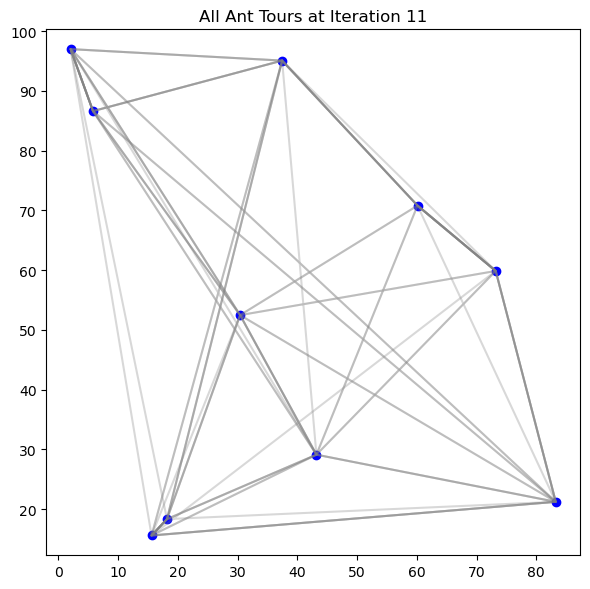

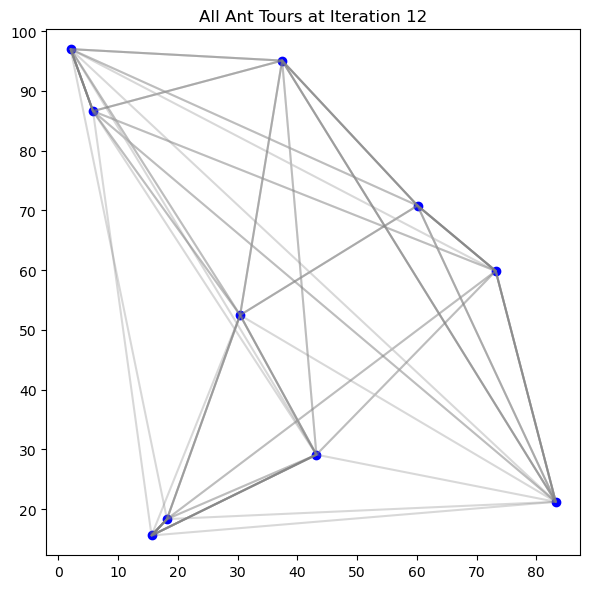

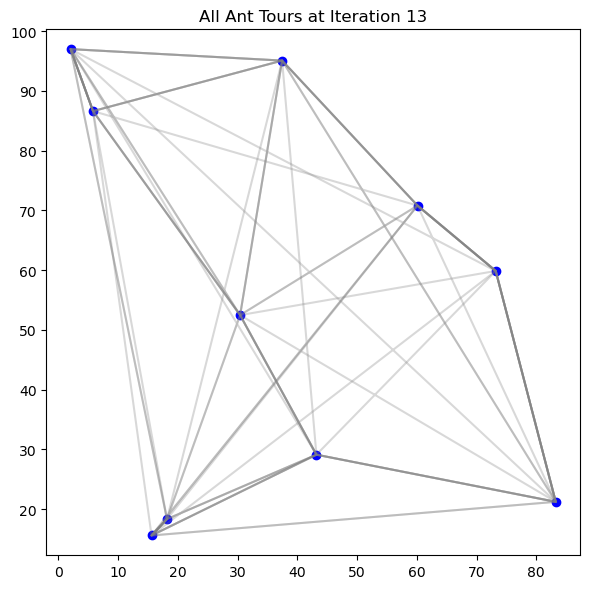

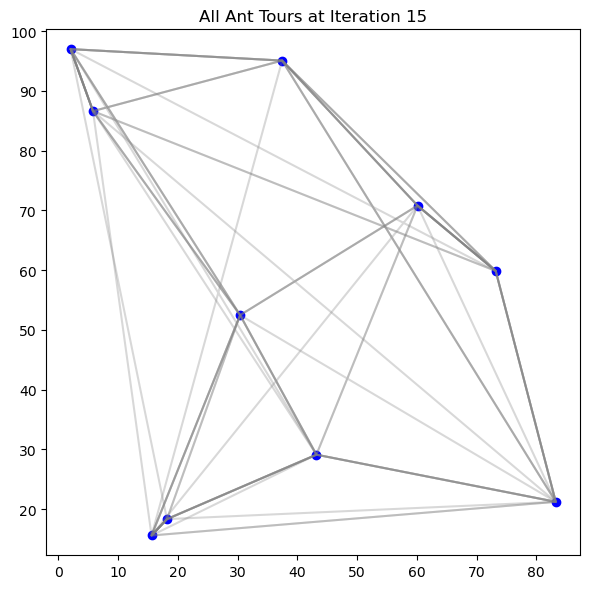

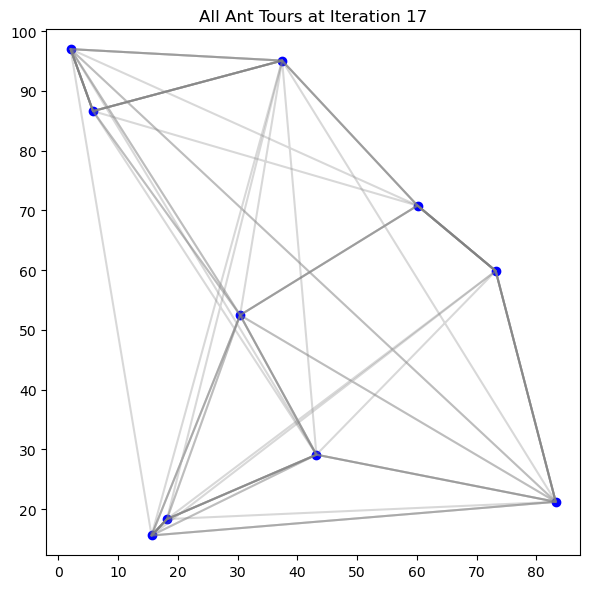

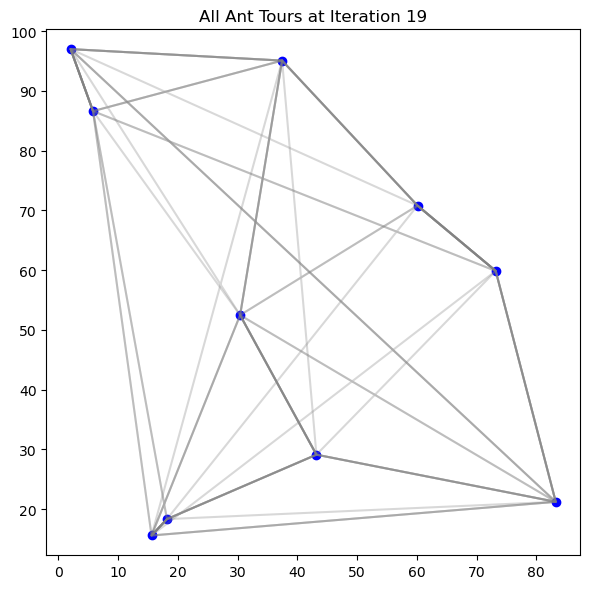

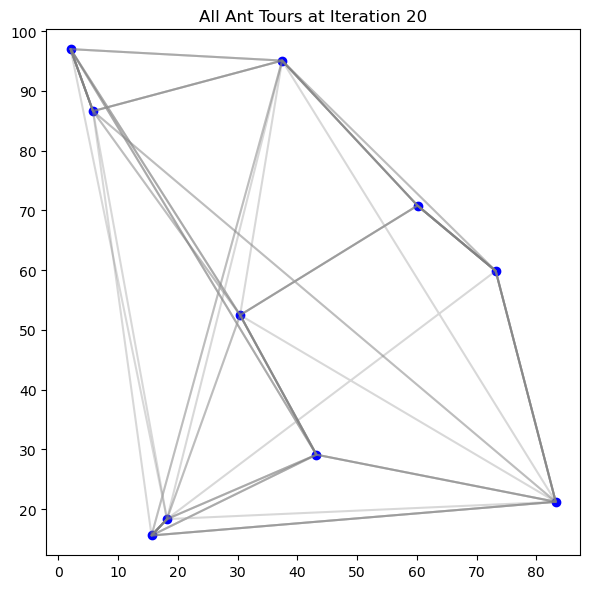

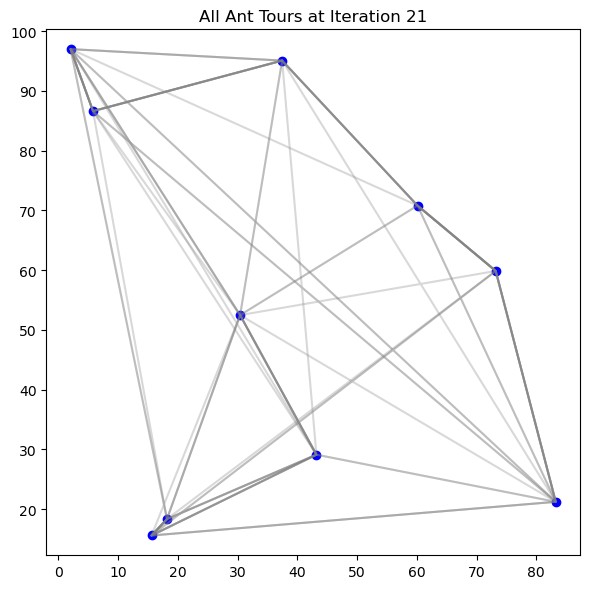

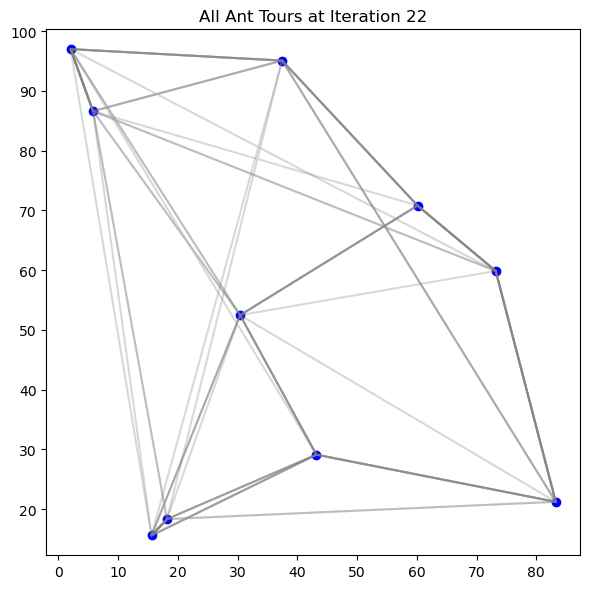

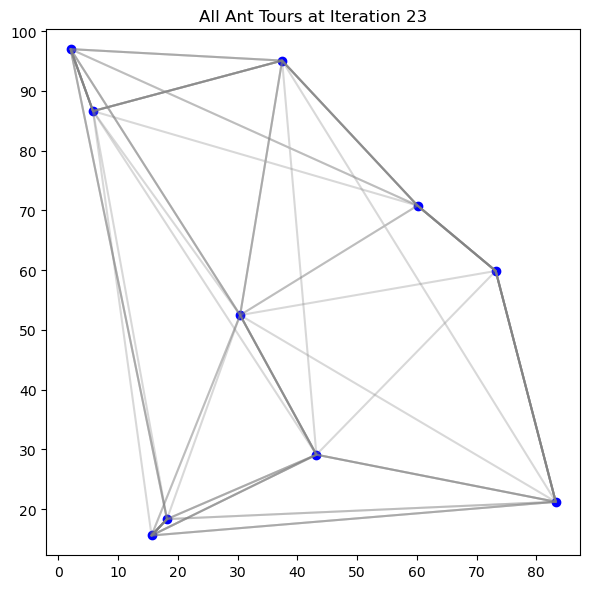

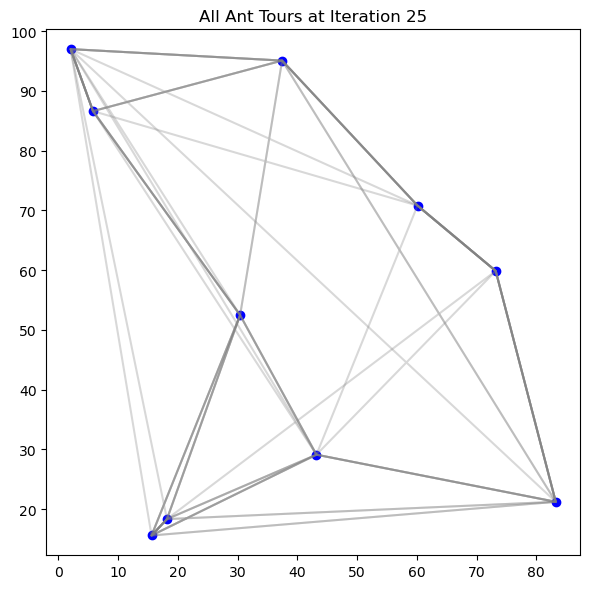

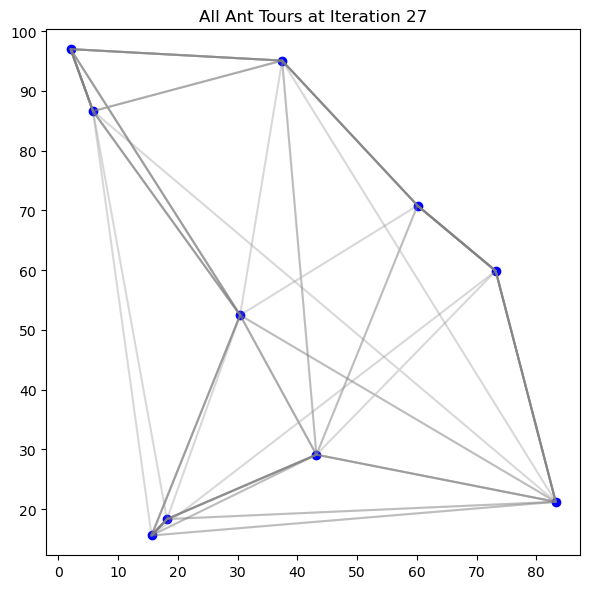

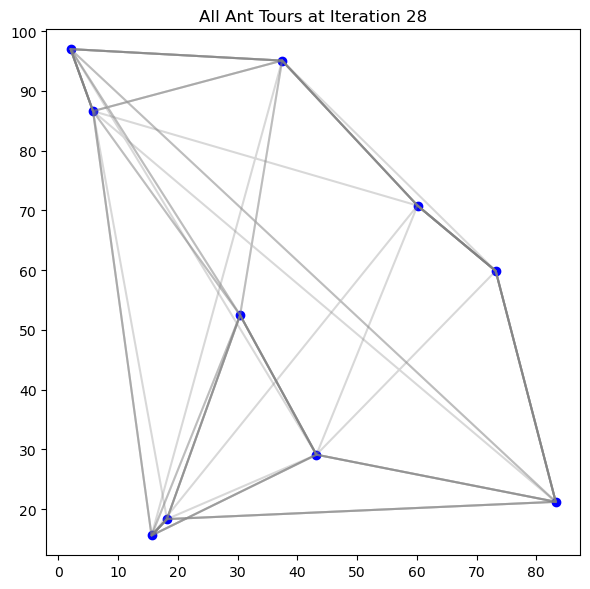

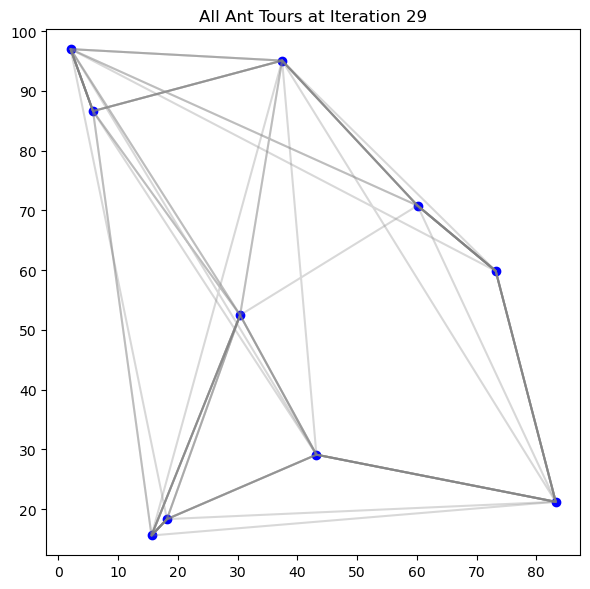

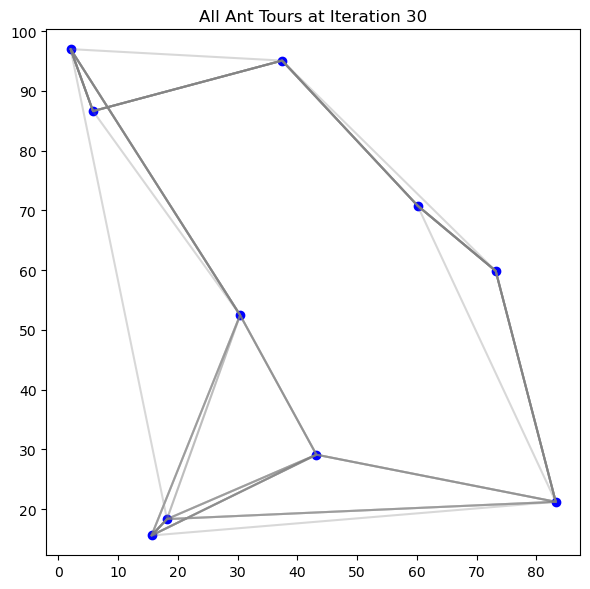

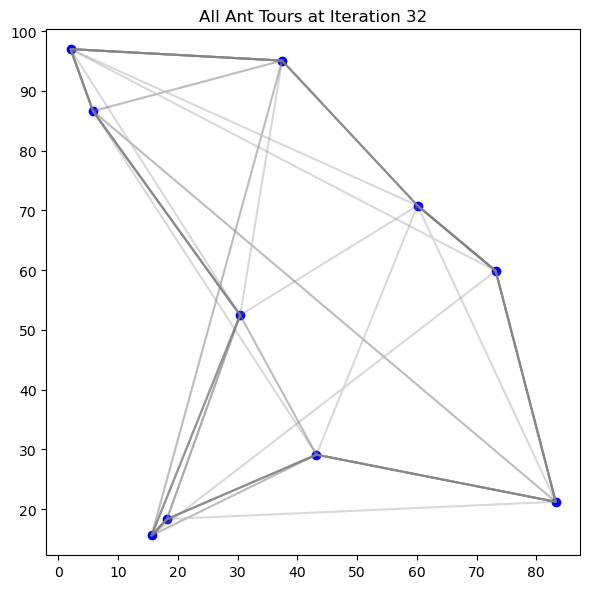

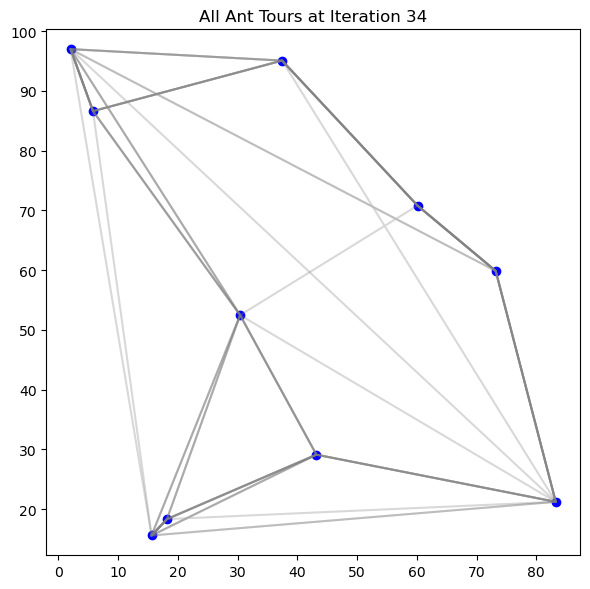

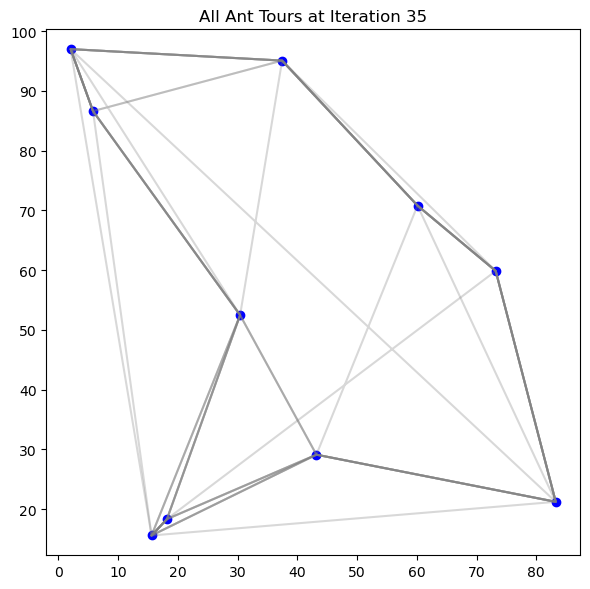

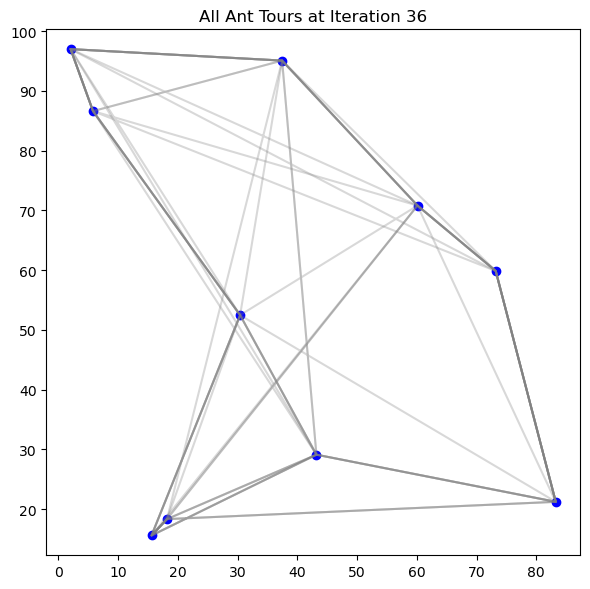

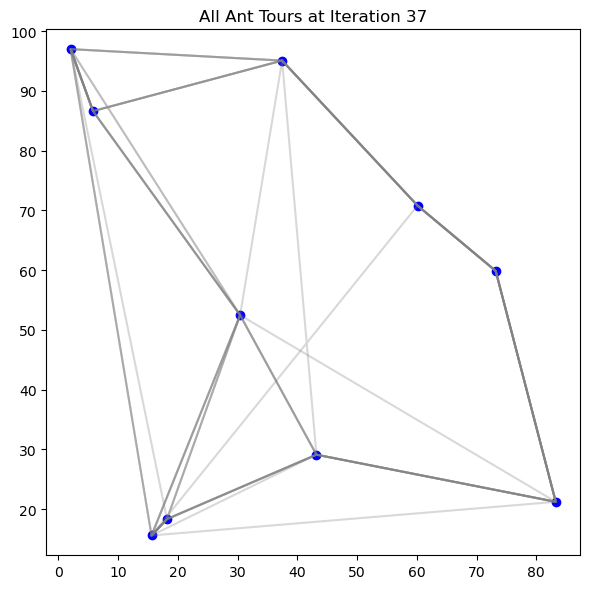

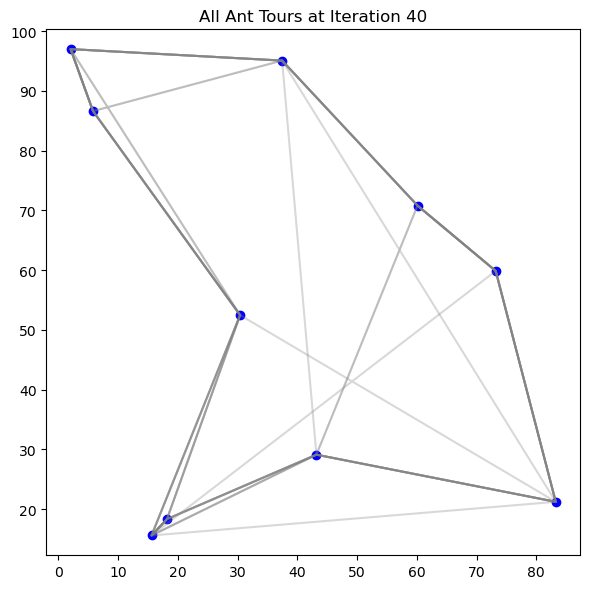

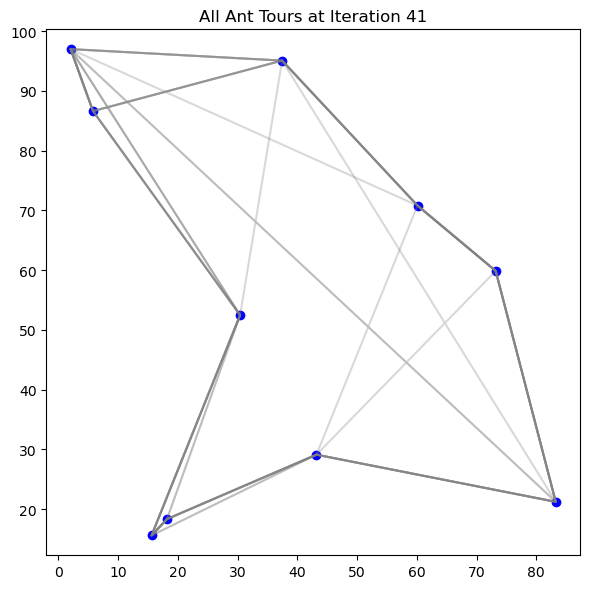

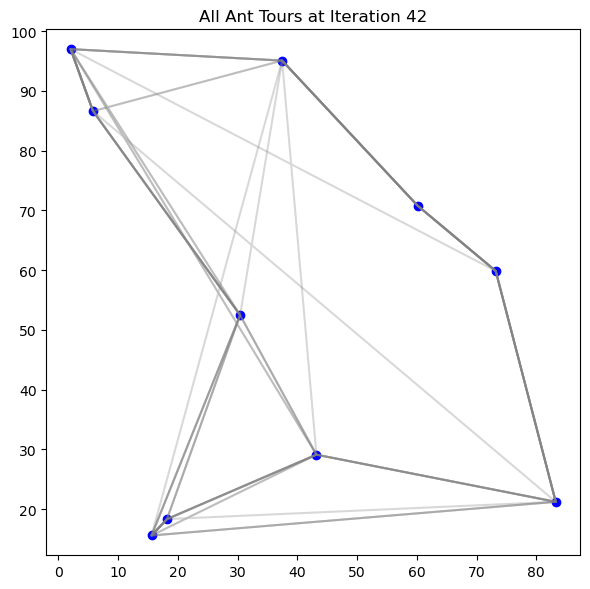

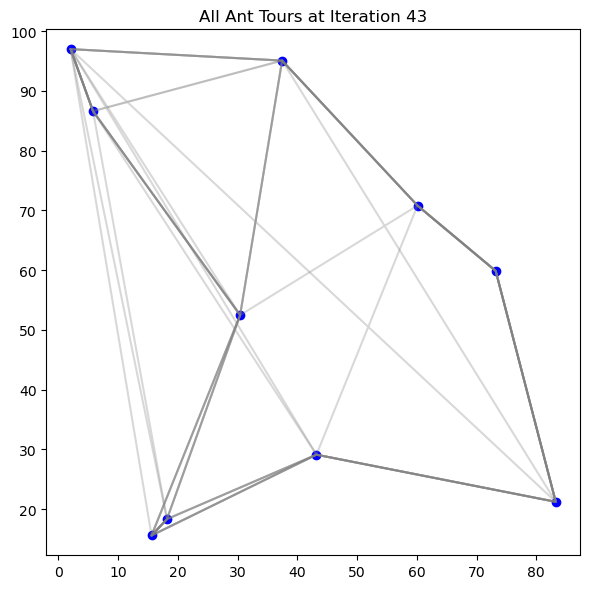

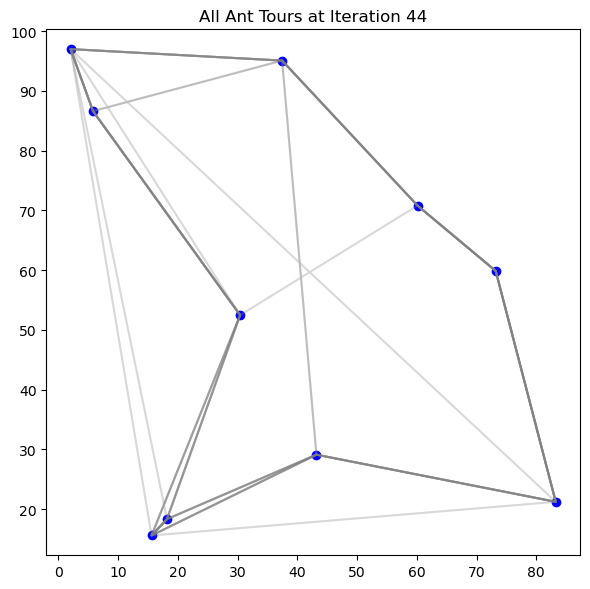

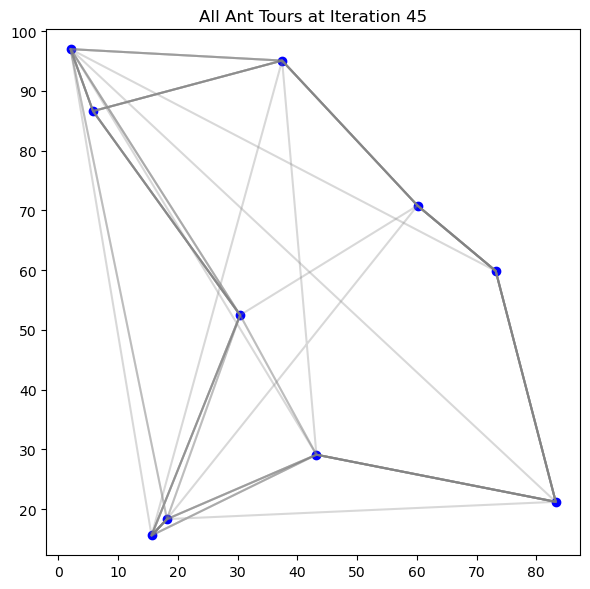

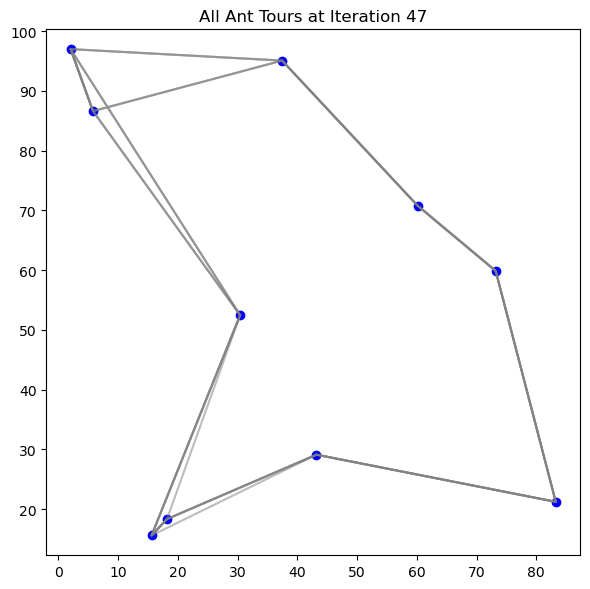

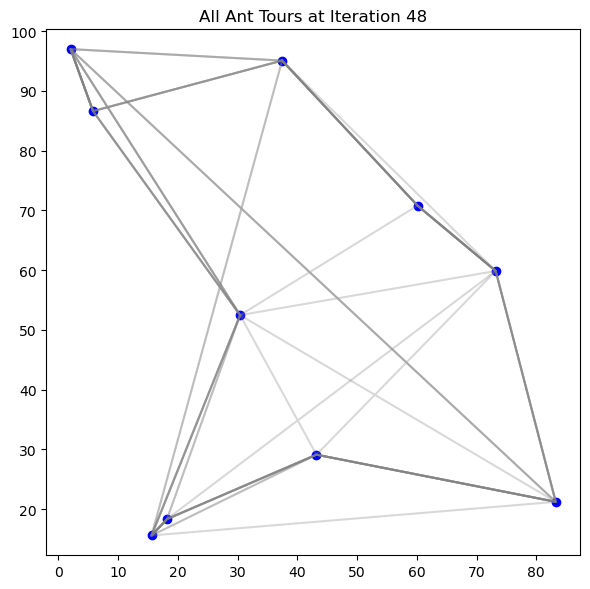

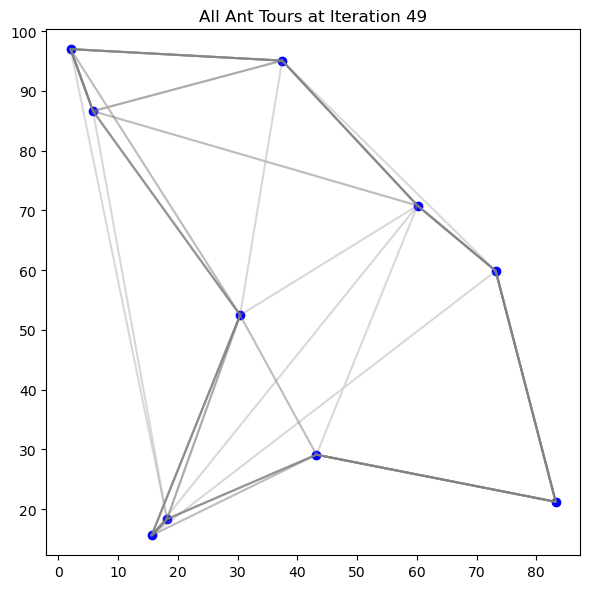

In [20]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(42)
    num_cities = 10
    cities = [City(np.random.uniform(0,100), np.random.uniform(0,100))
              for _ in range(num_cities)]

    num_ants = 10
    num_iterations = 50
    alpha, beta, rho, Q = 1, 2, 0.1, 100

    # initial tour length for tau_max
    initial_tour = list(range(num_cities))
    initial_distance = sum(
        cities[initial_tour[i]].distance(cities[initial_tour[(i+1)%num_cities]])
        for i in range(num_cities)
    )
    tau_max = 1.0 / (rho * initial_distance)
    tau_min = tau_max / (2 * num_cities)

    best_tour, best_distance, tours_history = mmas_tsp(
        cities, num_ants, num_iterations,
        alpha, beta, rho, Q, tau_max, tau_min
    )
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance:.3f}")

    # Now plot all tours, iteration by iteration
    for it, tours in enumerate(tours_history, start=1):
        plt.figure(figsize=(6,6))
        # draw all ant tours in light gray
        for tour in tours:
            xs = [cities[i].x for i in tour] + [cities[tour[0]].x]
            ys = [cities[i].y for i in tour] + [cities[tour[0]].y]
            plt.plot(xs, ys, color='gray', alpha=0.3)
        # draw cities
        plt.scatter([c.x for c in cities], [c.y for c in cities], color='blue')
        plt.title(f"All Ant Tours at Iteration {it}")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

    # finally, overlay the best tour in red
    fig, ax = plt.subplots(figsize=(6,6))
    xs = [cities[i].x for i in best_tour] + [cities[best_tour[0]].x]
    ys = [cities[i].y for i in best_tour] + [cities[best_tour[0]].y]
    ax.plot(xs, ys, '-o', color='red')
    ax.set_title("Best Tour Found")
    ax.axis('equal')
    plt.show()